In [2]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

### 1-2-1 최소자승 회귀분석

In [3]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3
x = np.linspace(-2, 4, 25)

In [4]:
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [5]:
y = f(x)

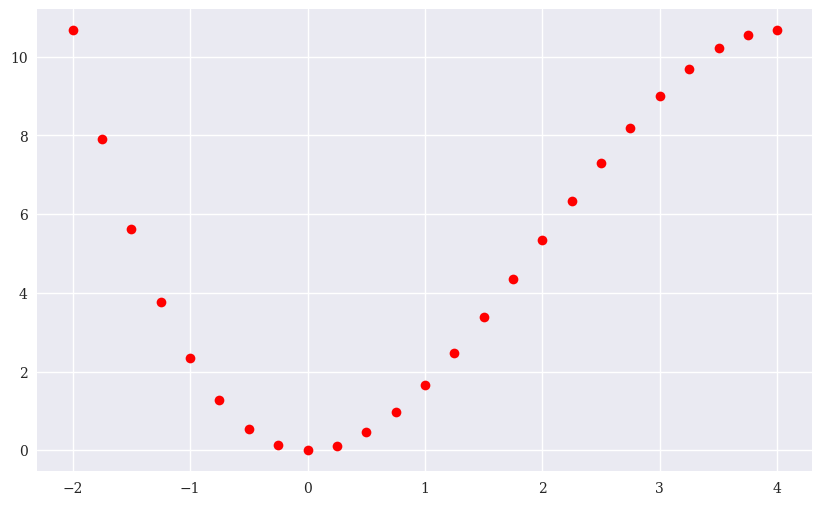

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro')

In [7]:
# 최적 beta 계산
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

1.054166666666667

In [8]:
# 최적 alpha 계산
alpha = y.mean() - beta * x.mean()
alpha

3.8625

In [9]:
# 출력값 추정치 계산
y_ = alpha + beta * x
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

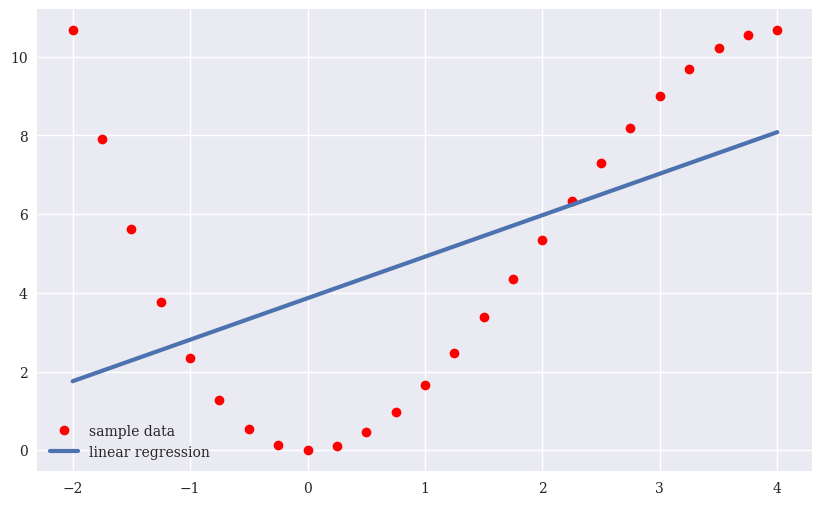

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend()

deg=1 | MSE=10.72195
deg=2 | MSE=10.72195
deg=3 | MSE=10.72195


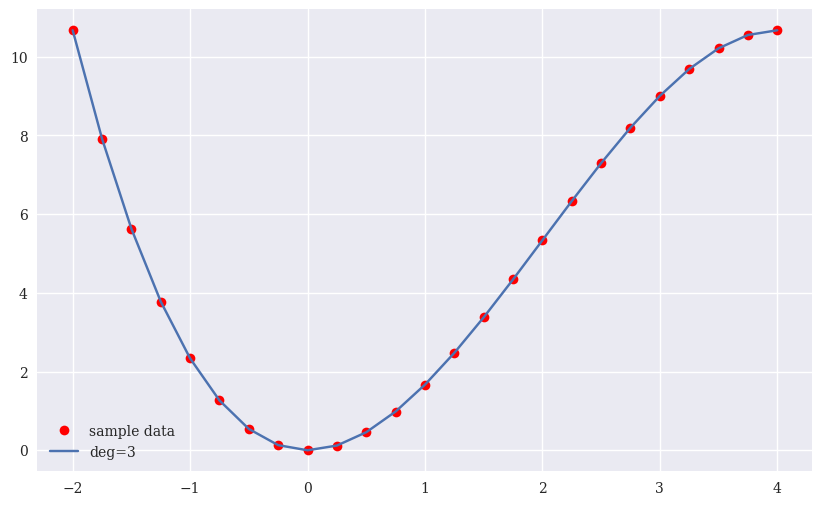

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    # 회귀분석 단계
    reg = np.polyfit(x, y, deg=deg)
    # 추정 단계
    y_ = np.polyval(reg, x)
    # 평균제곱오차 계산
    print(f'deg={deg} | MSE={MSE:.5f}')
plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend()